**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План исследования**
- Изучение общей информации о выгрузке 
- Подготовить данные к исследованию 
- Провести исследовательский анализ 
- Составить портрет пользователя каждого региона
- Проверить гипотезы 
- Составить общий вывод 

**Шаг 1. Открытие файла с данными и изучение общей информацию**

In [1]:
#Импортируем библиотеки 
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Считываем файл 
data = pd.read_csv('/datasets/games.csv')

In [3]:
#Открываем для просмотра первые 5 строк фрейма 
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Изучаем общую информацию о фрейме 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод по Шагу 1**
- Необходимо привести названия столбцов к "хорошему стилю" 
- Есть пропущенные значения, их необходимо будет заполнить 
- Необходимо изменить тип данных в некоторых колонках 
- В целом данных достаточно для того, чтобы приступить к исследованию 

**Шаг 2. Подготовка данных к исследованию** 

In [5]:
#Преобразуем буквы из наименований столбцов с строчные 
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#Поиск явных дубликатов 
data.duplicated().sum()

0

In [7]:
#Обработка пропусков 
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#Не заполнены данные в стобцах name и genre, скорее всего техническая ошибка, так что удалим эти строки 
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])
data.isna().sum()


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [9]:
#Игры, в которых нет даты выпуска, также удалим 
data = data.dropna(subset=['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [10]:
#Далее разберемся со столбцами critic_score, user_score и rating 
print (data['critic_score'].isna().sum() / len(data['name'])*100)
print (data['user_score'].isna().sum() / len(data['name'])*100)
print (data['rating'].isna().sum() / len(data['name'])*100)

51.453417659936754
40.166626125030405
40.59839455120409


In [11]:
#Пропуски в данных стобцах состовляют от 40 до 51% от общего числа данных, поэтому удалить мы их не можем
print (data['critic_score'].unique())
print (data['user_score'].unique())
print (data['rating'].unique())

print (data[data['user_score'] == 'tbd'].count())

#Заменим Nan и tbd 
data['user_score'] = pd.to_numeric(
    data['user_score'].replace('tbd', np.nan), 
    downcast='float'
)
data['rating'] = data['rating'].fillna('UK') #unknown

# Подставить какие либо данные в данные столбцы user_score и critic_score мы не можем, т.к. на основе других столбцов нельзя это сделать
data.isna().sum()

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
name               2376
platform           2376
yea

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [12]:
#Замения тип данных в стобцах, где это необходимо 
data['year_of_release'] = (data['year_of_release']).astype('uint16')
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']:
    data[i] = data[i].astype('float16') 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  uint16 
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float16
 5   eu_sales         16444 non-null  float16
 6   jp_sales         16444 non-null  float16
 7   other_sales      16444 non-null  float16
 8   critic_score     7983 non-null   float16
 9   user_score       7463 non-null   float16
 10  rating           16444 non-null  object 
dtypes: float16(6), object(4), uint16(1)
memory usage: 867.2+ KB


In [13]:
#Обработка неявных дубликатов по названию, дате выпуска и платформе 
#print(data[data.duplicated(['name', 'platform', 'year_of_release'])].count())
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])
data[data.duplicated(['name', 'platform', 'year_of_release'])].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [14]:
#Cуммарные продажи во всех регионах и вынесем их в отдельный столбец.
data['all_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.375000,28.953125,3.769531,8.453125,76.0,8.000000,E,82.500
1,Super Mario Bros.,NES,1985,Platform,29.078125,3.580078,6.808594,0.770020,NaN,NaN,UK,40.250
2,Mario Kart Wii,Wii,2008,Racing,15.679688,12.757812,3.789062,3.289062,82.0,8.296875,E,35.500
3,Wii Sports Resort,Wii,2009,Sports,15.609375,10.929688,3.279297,2.949219,80.0,8.000000,E,32.750
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.273438,8.890625,10.218750,1.000000,NaN,NaN,UK,31.375


**На мой взгляд пропуски возникли в следствии того, что выгрузка собиралась из разных открытых источников. Также стоит уточнить, что оценка ESRB необязательна для выпуска игр.**

**Вывод по Шагу 2**
- Название столбцов были приведены к "хорошему стилю"
- Восстановлены пропуски в строках (за исплючением user_score и critic_score, а в столбце rating пропущенным значениям присвоено UK - unknown)
- Удалены строки без нужных данных (были пропуски в столбцах name и year_of_release) 
- Данные приведены к нужному типу данных 
- Добавлен новый столбец суммарных продаж во всех регионах

In [15]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  uint16 
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float16
 5   eu_sales         16443 non-null  float16
 6   jp_sales         16443 non-null  float16
 7   other_sales      16443 non-null  float16
 8   critic_score     7982 non-null   float16
 9   user_score       7462 non-null   float16
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float16
dtypes: float16(7), object(4), uint16(1)
memory usage: 899.2+ KB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!'

**Шаг 3. Исследовательский анализ данных**

**3.1 Исследование выпуска игр в различные годы** 

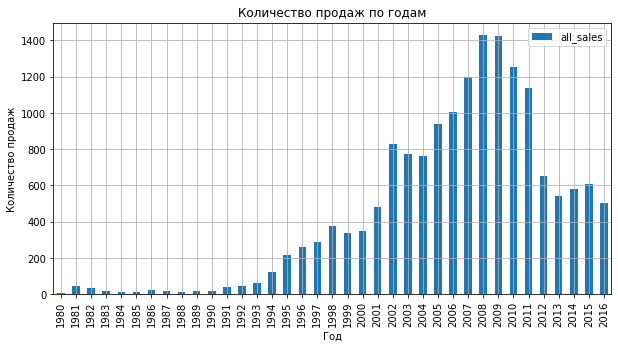

In [16]:
(
    data.pivot_table(
    index='year_of_release', 
    values='all_sales', 
    aggfunc=('count') 
).plot(kind='bar' , grid=True, figsize=(10, 5))
)

plt.title('Количество продаж по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()


***Наблюдается рост количества релизов с 1980 по 2008 год, затем идет спад***

**3.2 Исследование изменений продаж по платформам**

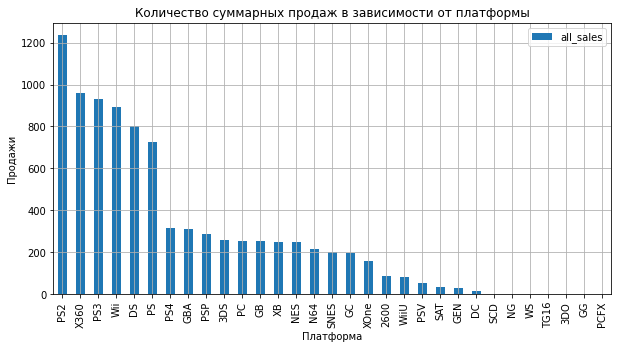

In [17]:
(
    data.pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество суммарных продаж в зависимости от платформы')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

In [18]:
# мы получили, что у следующих платформ наибольшие продажи: PS2, X360, PS3, Wii, DS, PS
top_platform_sales = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).reset_index().head(6)['platform'].tolist()
top_platform_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

***Наибольшие продажи у платформ PS2, X360, PS3, Wii, DS, PS***

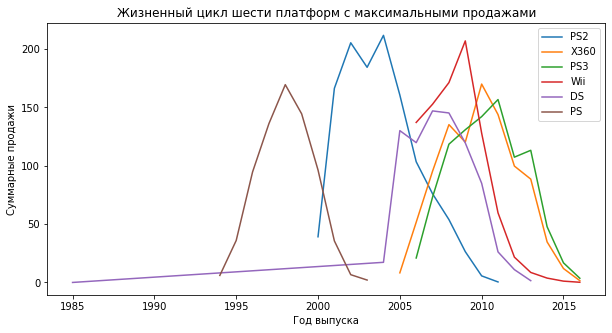

In [19]:
for name in top_platform_sales:
    (
    data.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['all_sales']
    .plot(figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл шести платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

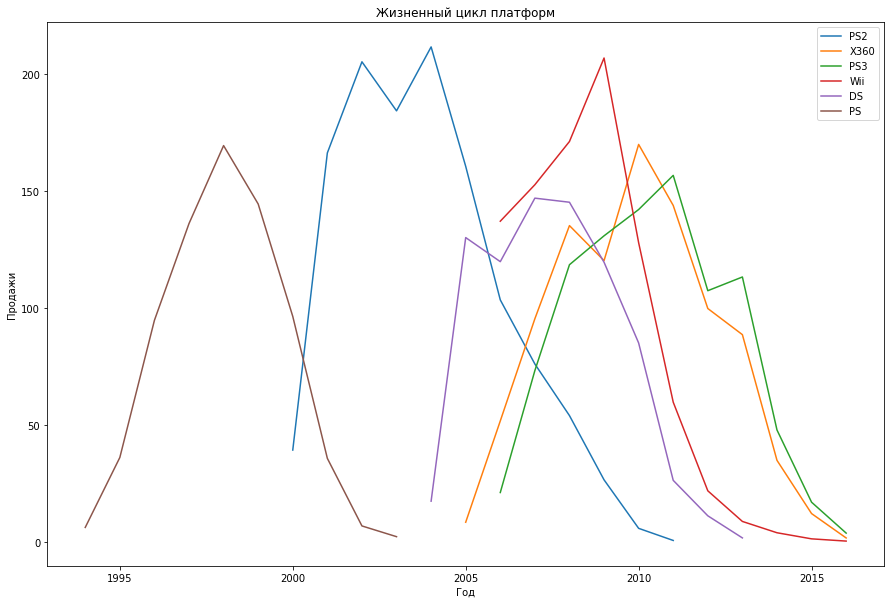

In [20]:
# Анализ платформы 'DS' c 1985 по 2005 год 
data.loc[
    (data['platform'] == 'DS') 
    & (1984 <= data['year_of_release'])
    & (data['year_of_release'] <= 2005)
].sort_values(by='year_of_release').head(30)

#Игра 1985 года продавалсь только в Японии, похоже на то, что была выпущена 1 игра, затем компанич была замороженна до 2004 года, необходимо удалить данную строчку
data = data.drop(index = 15957)

#Построим график заново 
for name in top_platform_sales:
    (
    data.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['all_sales']
    .plot(figsize = (15, 10), label=name)
    )
    plt.title('Жизненный цикл платформ')
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.legend() 

***Построен график по продажам на платформах. Можно сделать вывод, что в среднем платформа существует 8-10 лет, рост количества релизов 4 года, затем идет на спад. Связано это с тем, что выходят более современные платформы.*** 

In [21]:
#За какой характерный срок появляются новые и исчезают старые платформы?
# Количество лет активности платформы

platform_total_years = pd.DataFrame()

#Всего существовала платформа
platform_total_years['all_years'] = data.sort_values(by='all_sales').pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='all_sales', 
    aggfunc='count'
).count()

# Появление платформы
platform_total_years['min_years'] = data.pivot_table(
    index='platform', 
    values='year_of_release', 
    aggfunc=('min')
)

# Окончание платформы
platform_total_years['max_years'] = data.groupby('platform')['year_of_release'].agg('max')

platform_total_years['was_actual'] = platform_total_years['max_years'] - platform_total_years['min_years']

print (platform_total_years.sort_values(by='all_years', ascending=False))

platform_total_years['all_years'].describe()

          all_years  min_years  max_years  was_actual
platform                                             
PC               26       1985       2016          31
GB               13       1988       2001          13
NES              12       1983       1994          11
X360             12       2005       2016          11
PSP              12       2004       2015          11
PS2              12       2000       2011          11
Wii              11       2006       2016          10
PS3              11       2006       2016          10
2600             10       1980       1989           9
SNES             10       1990       1999           9
PS               10       1994       2003           9
DS               10       2004       2013           9
XB                9       2000       2008           8
GBA               8       2000       2007           7
N64               7       1996       2002           6
DC                7       1998       2008          10
GC                7       20

count    31.000000
mean      7.645161
std       5.063256
min       1.000000
25%       4.000000
50%       7.000000
75%      10.500000
max      26.000000
Name: all_years, dtype: float64

***Согласно получившемся результатам, можно сделать вывод, что разные платформы имеют разную продолжительность существования, с минимальной значением в 1 год (‘TG16’) и максимальным значением в 26 PC. Cредняя продолжительность жизни платформы 7.6 лет, медианная 7 лет.*** 

**3.3 Исследование данных за актульный период** 

In [22]:
#Согласно прошлому исследованию нижний квартиль жизни платформы равен 4 года, соответственно мы можем взять платформы, которые вышли в 2013 году. 
actual_data = data.query('year_of_release > 2013')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.031250,5.859375,0.360107,2.380859,NaN,NaN,UK,14.632812
42,Grand Theft Auto V,PS4,2014,Action,3.960938,6.308594,0.379883,1.969727,97.0,8.296875,M,12.617188
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.351562,3.490234,3.099609,0.740234,NaN,NaN,UK,11.687500
77,FIFA 16,PS4,2015,Sports,1.120117,6.121094,0.059998,1.280273,82.0,4.300781,E,8.578125
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.990234,3.490234,0.219971,1.280273,NaN,NaN,UK,7.980469
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.000000,0.000000,0.010002,0.000000,NaN,NaN,UK,0.010002
16707,Aiyoku no Eustia,PSV,2014,Misc,0.000000,0.000000,0.010002,0.000000,NaN,NaN,UK,0.010002
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.000000,0.010002,0.000000,NaN,NaN,UK,0.010002
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.000000,0.010002,0.000000,NaN,NaN,UK,0.010002


In [23]:
#Также определим платформы которые вышли в 2013 году или позжем. 
platform_total_years[platform_total_years['min_years'] >= 2013]

,all_years,min_years,max_years,was_actual
platform,,,,
PS4,4,2013,2016,3
XOne,4,2013,2016,3


***Подготовили список за актуальный период, также выделили платформы, которые попадают под первый квартиль жизни платформ.*** 

In [24]:
#Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
top_sales_platform = pd.pivot_table(actual_data, index=['platform', 'year_of_release'], 
                                     values='all_sales', aggfunc = 'sum')
print (top_sales_platform)

top_sales_platform = pd.pivot_table(actual_data, index='platform', 
                                     values='all_sales', aggfunc = 'sum')
top_sales_platform.sort_values('all_sales', ascending=False)

                           all_sales
platform year_of_release            
3DS      2014              43.781250
         2015              27.781250
         2016              15.132812
PC       2014              13.281250
         2015               8.515625
         2016               5.250000
PS3      2014              47.750000
         2015              16.828125
         2016               3.599609
PS4      2014             100.000000
         2015             118.875000
         2016              69.250000
PSP      2014               0.239990
         2015               0.119995
PSV      2014              11.898438
         2015               6.250000
         2016               4.250000
Wii      2014               3.750000
         2015               1.140625
         2016               0.179932
WiiU     2014              22.031250
         2015              16.343750
         2016               4.601562
X360     2014              34.750000
         2015              11.960938
 

,all_sales
platform,
PS4,288.250000
XOne,140.375000
3DS,86.687500
PS3,68.187500
X360,48.218750
WiiU,42.968750
PC,27.046875
PSV,22.406250
Wii,5.070312


***Продажи растут у PS4, XOne, 3DS, WiiU и PSV, на убыль идут приставки предыдущего поколения PS3, X360, DS, Wii и PSP***

***Лидером среди платформ в актуальный период является PS4, затем с большим отрывом идут XOne и 3DS*** 



**3.4 Построение «Ящика с усами» по глобальным продажам игр в разбивке по платформам**

Text(0, 0.5, 'Продажи')

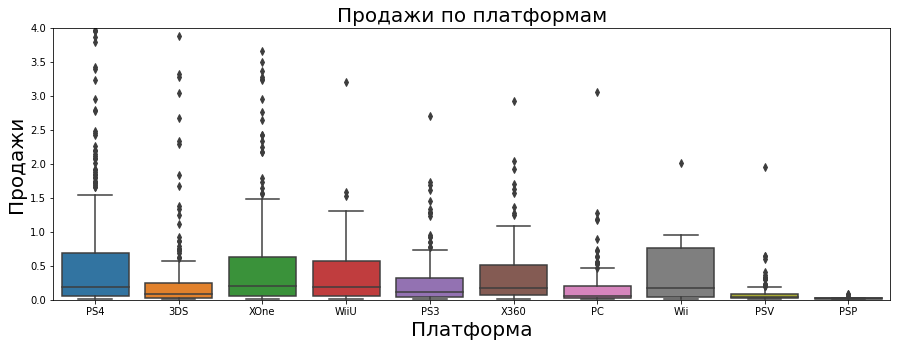

In [25]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=actual_data, x='platform', y='all_sales')
ax.set(ylim=(0,4))
plt.title('Продажи по платформам', fontsize=20)
plt.xlabel('Платформа', fontsize=20)
plt.ylabel('Продажи',fontsize=20)

Text(0, 0.5, 'Продажи')

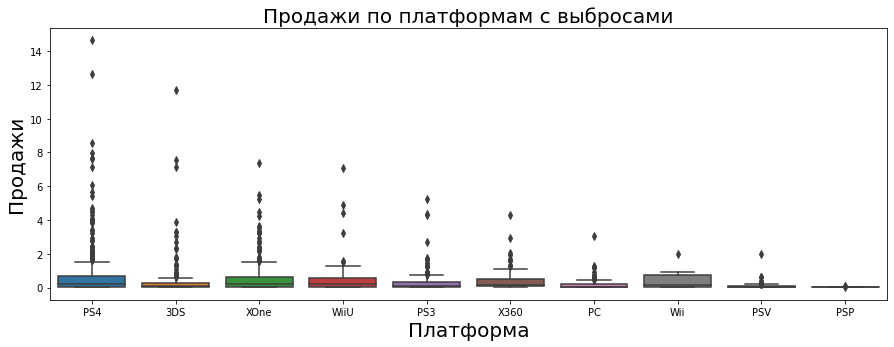

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(data=actual_data, x='platform', y='all_sales')
plt.title('Продажи по платформам с выбросами', fontsize=20)
plt.xlabel('Платформа', fontsize=20)
plt.ylabel('Продажи',fontsize=20)

***По всем платформам наблюдаются выбросы по продажам, также стоит отметить, что по первой и третьей квартили рахных платформ наблюдается большой разброс. Наиболее перспективными выглядят платформы PS4 и XOne, они входят в топ платформ с максимальным третьим квартилем.***


**3.5 Исследование влиния на продажи внутри одной популярной платформы отзывов пользователей и критиков**

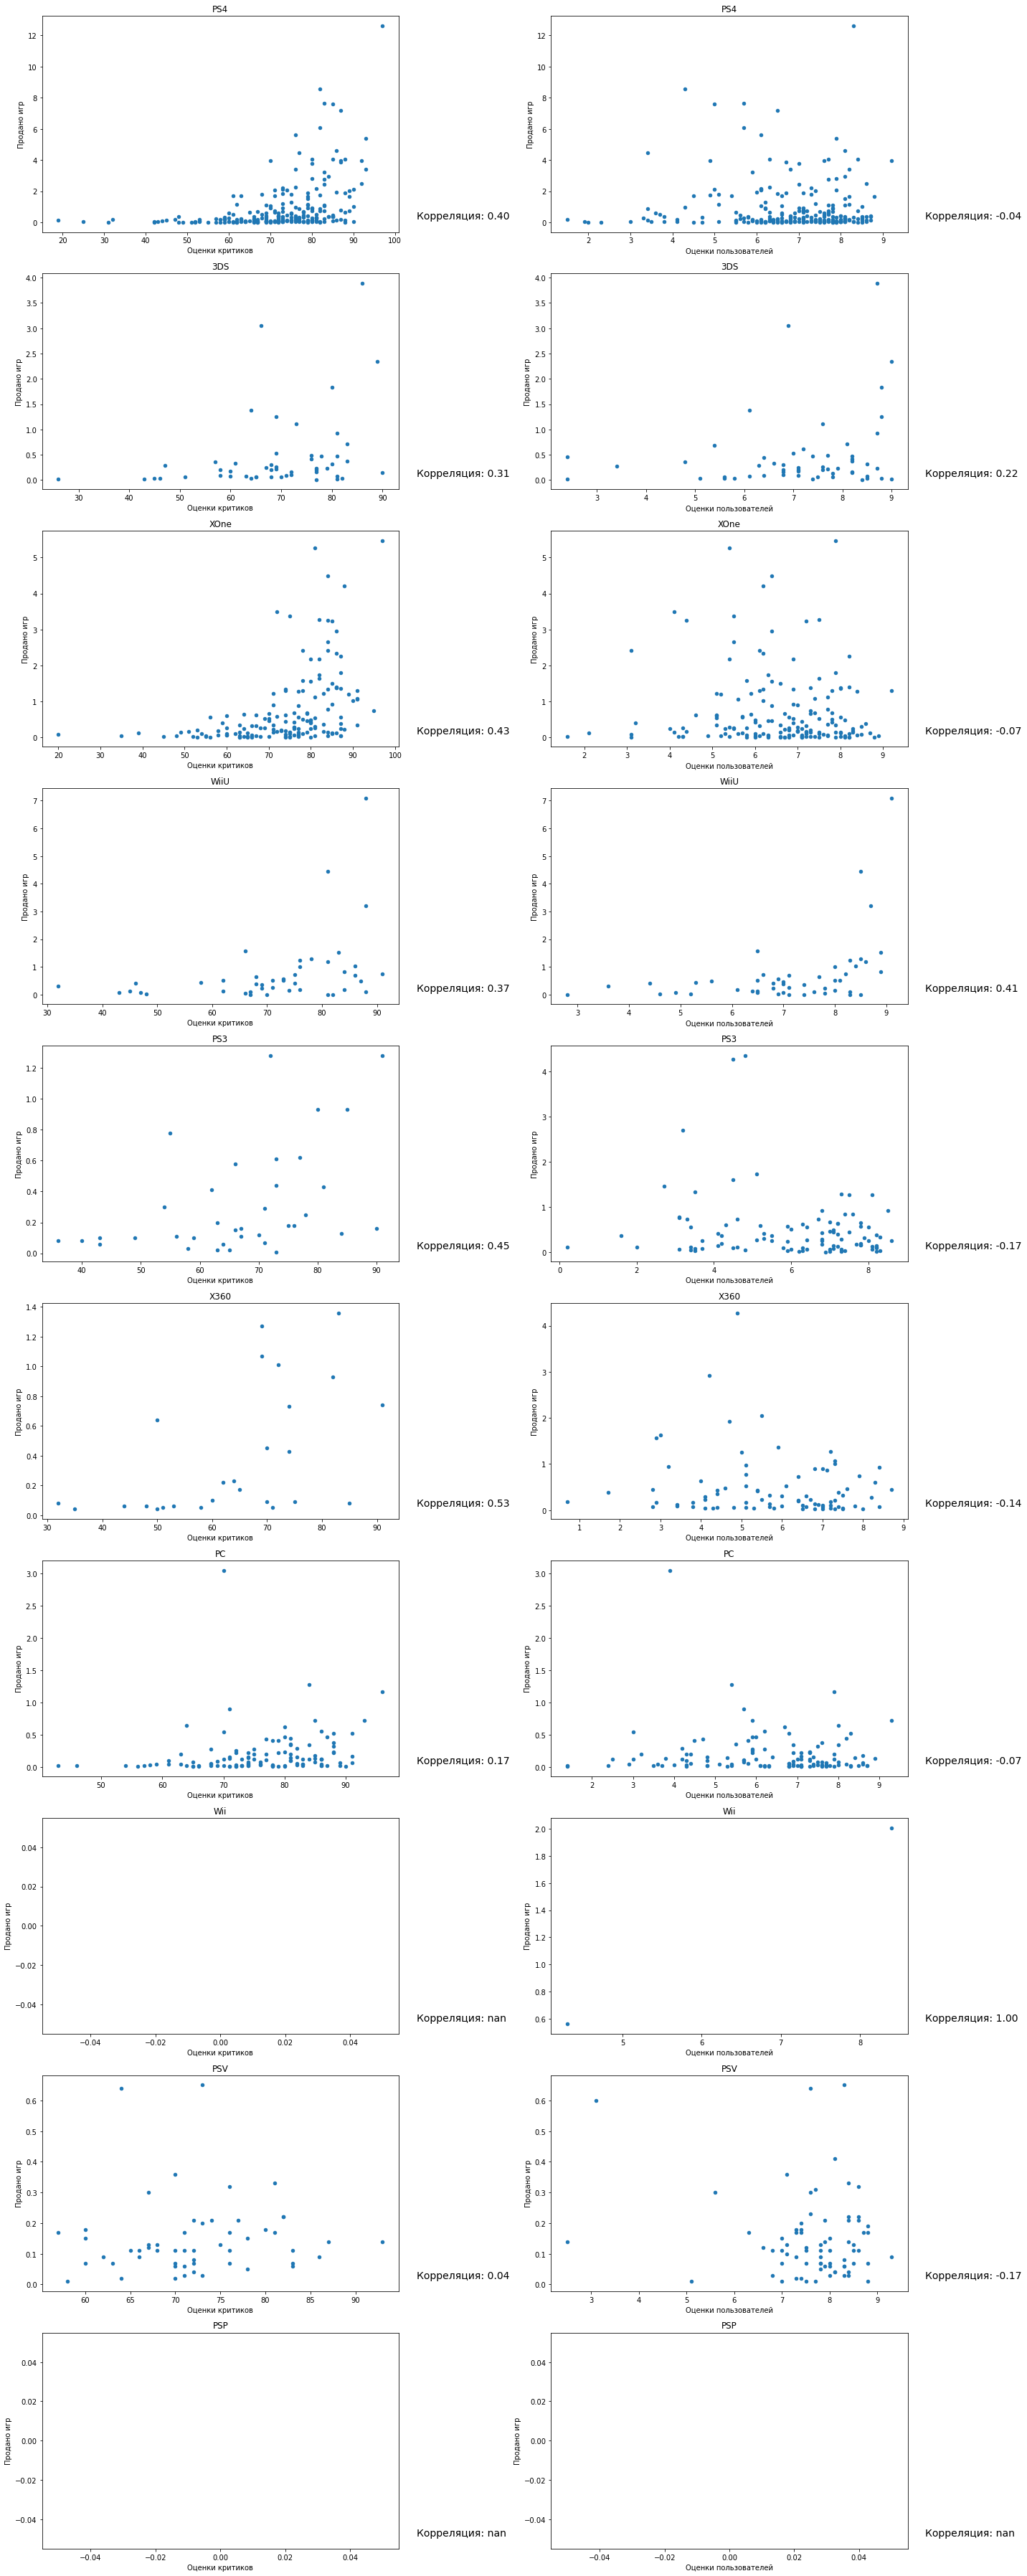

In [27]:
#Создаем список уникальных платформ
unique_platforms = list(actual_data['platform'].unique())

# Создаем массив для хранения графиков
fig, axes = plt.subplots(len(unique_platforms), 2, figsize=(20, 50))

# Цикл по уникальным платформам
for i, platform in enumerate(unique_platforms):
    
    # Цикл по типам оценок
    for j, score_type in enumerate(['Оценки критиков', 'Оценки пользователей']):
        
        # Фильтруем данные по платформе
        platform_data = actual_data[actual_data['platform'] == platform].rename(columns={
            'all_sales':'Продано игр',
            'critic_score':'Оценки критиков',
            'user_score':'Оценки пользователей' })
            
        # Рисуем график
        platform_data.plot.scatter(
            x=score_type, 
            y='Продано игр', 
            ax=axes[i, j], 
            title=platform
        )
        
         # Подсчитываем и отображаем корреляцию
        corr = platform_data[[score_type, 'Продано игр']].corr()
        axes[i, j].text(1.05, 0.05, f"Корреляция: {corr.iloc[0, 1]:.2f}", transform=axes[i, j].transAxes, fontsize=14, verticalalignment='bottom')

# Регулируем расстояние между графиками
fig.tight_layout()

# Показываем графики
plt.show()


***Исходя из данных выше, можно сделать вывод, что нет статистически значимой корреляции между отзывами критиков и пользователей с продажами на отдельно взятых платформах, а значит продажи от них зависят слабо.***

**Общее распределение игр по жанрам**

In [28]:
actual_data.pivot_table(
    index='genre',
    values='all_sales',
    aggfunc=('sum', 'median', 'count')
).rename(columns={
    'sum':'Сумма млн. продаж',
    'median':'Медиана продаж',
    'count':'Количество релизов'
}).sort_values(by='Сумма млн. продаж', ascending=False)


,Количество релизов,Медиана продаж,Сумма млн. продаж
genre,,,
Action,619,0.090027,199.375000
Shooter,128,0.514648,171.000000
Sports,161,0.180054,109.500000
Role-Playing,221,0.109985,101.437500
Misc,113,0.090027,37.562500
Fighting,60,0.125000,28.218750
Racing,69,0.089966,27.531250
Platform,38,0.140015,18.093750
Adventure,185,0.029999,17.546875


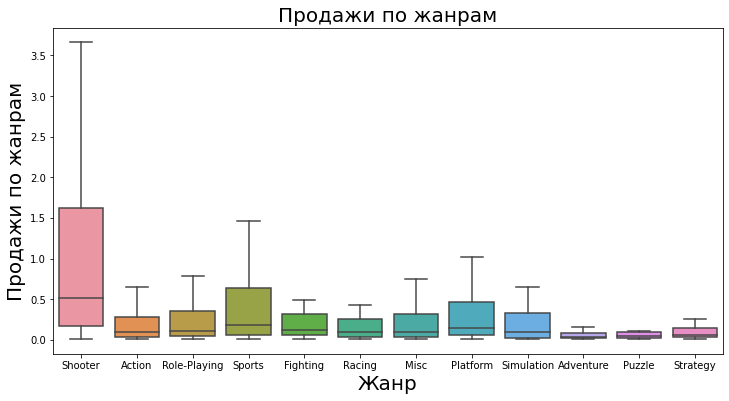

In [29]:
#Самые прибыльные жанры
plt.figure(figsize=(12,6))
sns.boxplot(
    x=actual_data['genre'], 
    y=actual_data['all_sales'], 
    showfliers=False
);
plt.title('Продажи по жанрам', fontsize=20)
plt.xlabel('Жанр', fontsize=20)
plt.ylabel('Продажи по жанрам',fontsize=20)
plt.show()

***Наиболее прибыльными жанрами являются Action, Shooter, Sports, Role-Playing. Также стоит отметить, что при мсравнение медианных значений по продажам в разрезе жанров предпочтение отдают Shooter и Sports (обладают большим медианным значением прибыли).***

**Вывод по Шагу 3**
- Рассмотрено, сколько игр выпускалось в разные годы. Наблюдается рост количества релизов с 1980 по 2008 год
- Рассмотрено, как менялись продажи по платформам в разные года (Выделены наибольшие продажи у платформ PS2, X360, PS3, Wii, DS, PS)
- Построен график по продажам на платформах. Сделан вывод, что в среднем платформа существует 8-10 лет, рост количества релизов 4 года, затем идет на спад. Связано это с тем, что выходят более современные платформы.
- Сделан вывод, что разные платформы имеют разную продолжительность существования, с минимальной значением в 1 год (‘TG16’) и максимальным значением в 26 PC. Cредняя продолжительность жизни платформы 7.6 лет, медианная 7 лет.
- Продажи платформ в актуальный период (последние 4 года) растут у PS4, XOne, 3DS, WiiU и PSV, на убыль идут приставки предыдущего поколения PS3, X360, DS, Wii и PSP
- Лидером среди платформ в актуальный период является PS4, затем с большим отрывом идут XOne и 3DS
- Сделан вывод, что нет статистически значимой корреляции между отзывами критиков и пользователей с продажами на отдельно взятых платформах. Т.е. продажи от них почти независимы. На графиках все значения «прижимаются» к осям координат. Значит, корреляция слабая.
- Наиболее прибыльными жанрами являются Action, Shooter, Sports, Role-Playing. Также стоит отметить, что при сравнение медианных значений по продажам в разрезе жанров предпочтение отдают Shooter и Sports (обладают большим медианным значением прибыли).

**Шаг 4. Портрет пользователя каждого региона**

**Самые популярные платформы (топ-5)**

In [30]:
#Сделаем срезы по разным регионам
na_actual_data = actual_data.query('na_sales > 0')
eu_actual_data = actual_data.query('eu_sales > 0')
jp_actual_data = actual_data.query('jp_sales > 0')
other_actual_data = actual_data.query('other_sales > 0')

In [31]:
#Самые популярные платформы в Северной Америке 
na_top_platform = pd.pivot_table(na_actual_data, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_top_platform

,na_sales
platform,
PS4,98.625000
XOne,81.250000
X360,28.296875
3DS,22.640625
PS3,22.046875
WiiU,19.359375
PC,7.230469
PSV,2.519531
Wii,2.080078


In [32]:
#Самые популярные платформы в Европе 
eu_top_platform = pd.pivot_table(eu_actual_data, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_top_platform

,eu_sales
platform,
PS4,130.000000
XOne,46.250000
PS3,25.546875
PC,17.968750
3DS,16.125000
X360,15.492188
WiiU,13.148438
PSV,3.531250
Wii,2.589844


In [33]:
#Самые популярные платформы в Японии
jp_top_platform = pd.pivot_table(eu_actual_data, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_top_platform

,jp_sales
platform,
3DS,22.671875
PS4,10.960938
WiiU,6.839844
PS3,4.769531
PSV,4.531250
XOne,0.310059
X360,0.080017
PC,0.000000
Wii,0.000000


In [34]:
#Самые популярные платформы в Японии
other_top_platform = pd.pivot_table(eu_actual_data, index='platform', values='other_sales',
                                        aggfunc='sum').sort_values('other_sales', ascending=False)
other_top_platform

,other_sales
platform,
PS4,43.812500
XOne,12.476562
PS3,9.140625
X360,4.269531
3DS,3.589844
WiiU,3.128906
PC,1.850586
PSV,1.660156
Wii,0.400146


**Рейтинг "Топ 5" платформ:**

- В Северной Америке: PS4, XOne, X360, PS3 и 3DS
- В Европейском союзе: PS4, PS3, XOne, X360 и 3DS
- В Японии: 3DS, PS3, PSV, PS4 и WiiU
- В Остальных регионах: PS4, XOne, PS3, X360, 3DS  
__________________________________________________________________________________________________
- В Северной Америке, Европейском союзе и "Остальных регионах" входят одинаковые платформы с перестановкой их предпочтения.  На на рынке Японии преобладают платформы, компании которых, расположенны именно в этом регионе. 

**Самые популярные жанры (топ-5)**

In [35]:
#Самые популярные платформы в Северной Америке
na_genre_top = pd.pivot_table(na_actual_data, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_top

,na_sales
genre,
Shooter,79.000000
Action,72.562500
Sports,46.125000
Role-Playing,33.468750
Misc,15.046875
Fighting,12.429688
Racing,8.742188
Platform,6.789062
Adventure,5.640625


In [36]:
#Самые популярные платформы в Европейском союзе
eu_genre_top = pd.pivot_table(eu_actual_data, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_top

,eu_sales
genre,
Action,74.687500
Shooter,65.500000
Sports,45.718750
Role-Playing,28.171875
Racing,14.132812
Misc,12.859375
Simulation,7.300781
Platform,6.800781
Fighting,6.691406


In [37]:
#Самые популярные платформы в Японии
jp_genre_top = pd.pivot_table(jp_actual_data, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_top

,jp_sales
genre,
Role-Playing,31.156250
Action,29.578125
Fighting,6.371094
Misc,5.609375
Shooter,4.871094
Adventure,3.599609
Sports,3.259766
Platform,2.689453
Simulation,2.310547


In [38]:
#Самые популярные платформы в Остальных регионах
other_genre_top = pd.pivot_table(other_actual_data, index='genre', values='other_sales',
                                        aggfunc='sum').sort_values('other_sales', ascending=False)
other_genre_top

,other_sales
genre,
Action,22.578125
Shooter,21.531250
Sports,14.359375
Role-Playing,8.640625
Misc,4.031250
Racing,2.890625
Fighting,2.730469
Adventure,1.820312
Platform,1.810547


**Рейтинг "Топ 5" жанров:**

- В Северной Америке: Action, Shooter, Sports, Role-Playing, Misc
- В Европейском союзе: Action, Shooter, Sports, Role-Playing, Racing
- В Японии: Role-Playing, Action, Fighting, Misc, Shooter
- В Остальных регионах: Action, Shooter, Sports, Role-Playing, Misc    

Во всех анализируемых регионах жанры: Action, Sports, Shooter, Role-Playing занимают лидирующие позиции. 
Игры в жанре Action лидируют по объёмам продаж в Северной Америке, чуть менее в Европе и «других» регионах. Racing популярен только в Европе, а Fighting в Японии. 

**Влияет ли рейтинг ESRB на продажи в отдельном регионе**

**Система ESRB**
- EC	 - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.
- E	- Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
- E 10+	- Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- T	- Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- M	- Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
- AO	- Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.
- RP	- Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

*Источник https://www.kingston.com/ru/blog/gaming/understanding-video-games-age-ratings-esrb-pegi

**Также отметим, что пропущенные значения, мы заменили на UK (unknown)** 

In [39]:
#Влияние рейтинга ESRB на продажи в Северной Америке 
na_rating_top = pd.pivot_table(na_actual_data, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_top

,na_sales
rating,
M,96.43750
UK,64.75000
E,50.75000
T,38.93750
E10+,33.21875


In [40]:
#Влияние рейтинга ESRB на продажи в Европейском союзе 
eu_rating_top = pd.pivot_table(eu_actual_data, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_top

,eu_sales
rating,
M,93.43750
UK,58.93750
E,58.06250
T,34.06250
E10+,26.15625


In [41]:
#Влияние рейтинга ESRB на продажи в Японии
jp_rating_top = pd.pivot_table(jp_actual_data, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_top

,jp_sales
rating,
UK,56.906250
T,14.781250
E,8.937500
M,8.007812
E10+,4.460938


In [42]:
#Влияние рейтинга ESRB на продажи в Других регионах
other_rating_top = pd.pivot_table(other_actual_data, index='rating', values='other_sales',
                                        aggfunc='sum').sort_values('other_sales', ascending=False)
other_rating_top

,other_sales
rating,
M,28.671875
UK,18.406250
E,15.390625
T,11.328125
E10+,7.832031


**Рейтинг ESRB**
- В Северной Америке, Европейском союзе разработчики ориентированы на создания контента для лиц старше 17 лет (М - rating) 

- В Японии лидириуют игры с возрастным рейтингом 13, здесь разработчики ориентированы на более юное поколение (T - rating). 

- Но стоит обратить внимание, что в нашей выгрузке очень много игр, которым не присвоен рейтинг. Особенно это касатеся Япоского рынка. 


**Вывод по Шагу 4**

**Портрет пользователей в разных регионах выглядит следующим образом**

- Для Северной Америке, Европейского союза и Других регионов наиболее характерно: платформы PS4, XOne, X360, PS3 игры в жанрах Action, Shooter, Sports, а рейтинг игр, согласно ESRB, для лиц старше 17 лет
- Для Японии наиболее характерно: платформы 3DS, PS3, PSV, PS4 (заметно преобладают местные игроки рынка), игры в жанрах Role-Playing, Action, Fighting, Misc, а рейтинг  игр согласно ESRB, для лиц старше 13 лет (но стоит учитывать, что самый большой процент, это игры без рейтинга). 

**Шаг 5. Проверьте гипотезы**

**Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
- Поставленный вопрос полностью совпадает с формулировкой нулевой гипотезы, которая всегда определяется как равна 
- Альтернативная гипотеза может быть проверена в трех направлениях "меньше", "не равно", "больше" 
- Т.к. в данной гипотезе идет вопрос про равенство, значит проверку надо провести двухстороннюю alternative='two-sided'

- #Н_0: Средние пользовательские рейтинги платформ Xbox One = PC 
- #Н_1: Средние пользовательские рейтинги платформ Xbox One != PC 



In [43]:
results = st.ttest_ind(
    actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'].dropna(),
    actual_data.loc[actual_data['platform'] == 'PC', 'user_score'].dropna(),
    equal_var=False,
    #для проверки на неравенство (в обе стороны)
    alternative='two-sided'
)
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую минуту')
    
xone_mean = actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'].mean()
pc_mean = actual_data.loc[actual_data['platform'] == 'PC', 'user_score'].mean()

print(f"Среднее значение для Action: {xone_mean}")
print(f"Среднее значение для Sports: {pc_mean}")

0.1151637700193269
Не получилось отвергнуть нулевую минуту
Среднее значение для Action: 6.59375
Среднее значение для Sports: 6.30078125


**Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**
- Поставленный вопрос не совпадает с нулевой гипотезой, которая должна быть всегда равна, поэтому выдвинута нулевая гипотеза как то, что пользовательские рейтинги жанров Action и Sports равны, если мы отвергнем нулевую гипотезу, значит рейтинги разные.  
- Альтернативная гипотеза может быть проверена в трех направлениях "меньше", "не равно", "больше" 
- Т.к. в данной гипотезе идет вопрос про равенство, значит проверку надо провести двухстороннюю alternative='two-sided'
- #Н_0: Средние пользовательские рейтинги жанров Action = Sports
- #Н_1: Средние пользовательские рейтинги жанров Action != Sports

In [44]:
results = st.ttest_ind(
    actual_data.loc[actual_data['genre'] == 'Action', 'user_score'].dropna(),
    actual_data.loc[actual_data['genre'] == 'Sports', 'user_score'].dropna(),
    equal_var=False,
    #для проверки на неравенство (в обе стороны)
    alternative='two-sided'
)
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую минуту')
    
action_mean = actual_data.loc[actual_data['genre'] == 'Action', 'user_score'].mean()
sports_mean = actual_data.loc[actual_data['genre'] == 'Sports', 'user_score'].mean()

print(f"Среднее значение для Action: {action_mean}")
print(f"Среднее значение для Sports: {sports_mean}")

1.1923084551646862e-14
Отвергаем нулевую гипотезу
Среднее значение для Action: 6.76171875
Среднее значение для Sports: 5.22265625


**Вывод по Шагу 5**

- После проверки гипотезы, что "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", при установленном уровне значимости в 5%, можем утверждать, что пользовательские рейтинги платформ XOne и PC равны (Не получилось отвергнуть нулевую минуту). 
- После проверки гипотезы, что "Средние пользовательские рейтинги жанров Action и Sports разные", при установленном уровне значимости в 5%, можем утверждать, что рейтинги жанров Action и Sports разные (Нулевая гипотеза отвергнута)


**Шаг 6. Общий вывод**


***В ходе Шага 1 было сделано следующее***
****Выводы касательно выгрузки****
- Необходимо привести названия столбцов к "хорошему стилю"
- Есть пропущенные значения, их необходимо будет заполнить
- Необходимо изменить тип данных в некоторых колонках
- О наличии данных в достаточном объёме для того, чтобы приступить к исследованию


***В ходе Шага 2 было сделано следующее***

- Названия столбцов были приведены к "хорошему стилю"
- Восстановлены пропуски в строках (за исплючением user_score и critic_score, а в столбце rating пропущенным значениям присвоено UK - unknown)
- Удалены строки без нужных данных (были пропуски в столбцах name и year_of_release)
- Приведены столбцы к нужному типу данных
- Добавлен новый столбец суммарных продаж во всех регионах (согласно заданию)

***В ходе Шага 3 было сделано следующее***

- Рассмотрено, сколько игр выпускалось в разные годы. Наблюдается рост количества релизов с 1980 по 2008 год
- Рассмотрено, как менялись продажи по платформам в разные года (Выделены наибольшие продажи у платформ PS2, X360, PS3, Wii, DS, PS)
- Построен график по продажам на платформах. Сделан вывод, что в среднем платформа существует 8-10 лет, рост количества релизов 4 года, затем идет на спад. Связано это с тем, что выходят более современные платформы.
- Сделан вывод, что разные платформы имеют разную продолжительность существования, с минимальной значением в 1 год (‘TG16’) и максимальным значением в 26 PC. Cредняя продолжительность жизни платформы 7.6 лет, медианная 7 лет.
- Продажи платформ в актуальный период (последние 4 года) растут у PS4, XOne, 3DS, WiiU и PSV, на убыль идут приставки предыдущего поколения PS3, X360, DS, Wii и PSP
- Лидером среди платформ в актуальный период является PS4, затем с большим отрывом идут XOne и 3DS
- Сделан вывод, что нет статистически значимой корреляции между отзывами критиков и пользователей с продажами на отдельно взятых платформах, а значит продажи от них зависят слабо.
- Наиболее прибыльными жанрами являются Action, Shooter, Sports, Role-Playing. Также стоит отметить, что при сравнение медианных значений по продажам в разрезе жанров предпочтение отдают Shooter и Sports (обладают большим медианным значением прибыли).

***В ходе Шага 4 было сделано следующее***
- Составлен портрет пользователей в разных регионах выглядит следующим образом

- Для Северной Америке, Европейского союза и Других регионов наиболее характерно: платформы PS4, XOne, X360, PS3 игры в жанрах Action, Shooter, Sports, а рейтинг игр, согласно ESRB, для лиц старше 17 лет
- Для Японии наиболее характерно: платформы 3DS, PS3, PSV, PS4 (заметно преобладают местные игроки рынка), игры в жанрах Role-Playing, Action, Fighting, Misc, а рейтинг игр согласно ESRB, для лиц старше 13 лет (но стоит учитывать, что самый большой процент, это игры без рейтинга).

***В ходе Шага 5 было сделано следующее***
- Было проверено 2 гипотезы (согласно заданию)

- После проверки гипотезы, что "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", при установленном уровне значимости в 5%, можем утверждать, что пользовательские рейтинги платформ XOne и PC равны (Не получилось отвергнуть нулевую минуту).
После проверки гипотезы, что "Средние пользовательские рейтинги жанров Action и Sports разные", при установленном уровне значимости в 5%, можем утверждать, что рейтинги жанров Action и Sports разные (Нулевая гипотеза отвергнута)